# Visualizations of UCERF3-ETAS and the N-test

William Savran <br>
11/26/18

# Overview
- Figures from UCERF3 catalogs
- Implemented N-test for stochastic event sets
- Evaluate the power of N-test following [Zechar et al., 2010]


# Simulation List

*Note: All times are UTC (+00:00)*

### UCERF3-ETAS
- Immediately following Landers (1992-06-28 11:57:35.0)
- Immediately following Big Bear (1992-06-28 15:48:42.8)
- 30 days following Big Bear (1992-07-28 15:48:42.8)

### UCERF3-NoFaults
- Immediately following Landers (1992-06-28 11:57:35.0)


In [1]:
import os
import time
import csep
import csep.models
from csep.core.evaluations import *
from csep.utils.plotting import *
import csep.utils.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Helping function to load catalogs
def comcat_loader(start_time, mw_min, verbose=False):
    t0 = time.time()
    comcat = csep.load_catalog(type='comcat', format='native',
                               start_epoch=start_time, duration_in_years=1.0,
                               min_magnitude=2.5, 
                               min_latitude=31.50, max_latitude=43.00,
                               min_longitude=-125.40, max_longitude=-113.10,
                               name='Comcat').filter('magnitude > {}'.format(mw_min))
    t1 = time.time()

    # Statements about Comcat Downloads
    if verbose:
        print("Fetched Comcat catalog in {} seconds.\n"
              .format(t1-t0))
        print("Downloaded Comcat Catalog with following parameters")
        print("Start Date: {}\nEnd Date: {}"
              .format(str(comcat.start_time), str(comcat.end_time)))
        print("Min Latitude: {:.2f} and Max Latitude: {:.2f}"
              .format(comcat.min_latitude, comcat.max_latitude))
        print("Min Longitude: {:.2f} and Max Longitude: {:.2f}"
              .format(comcat.min_longitude, comcat.max_longitude))
        print("Min Magnitude: {:.2f} and Max Magnitude: {:.2f}\n"
              .format(comcat.min_magnitude, comcat.max_magnitude))
    
    return comcat

In [3]:
mw_min = 4.95
duration_in_years = 1.0

# Filenames of target simulations
project_root = '/Users/wsavran/Projects/CSEP2/u3etas_simulations/landers_experiment'

In [4]:
# Build Simulation Objects, catalogs are not filtered by default
landers = csep.models.Simulation(filename = os.path.join(project_root, 
                                 '10-23-2018_landers-pt1/results_complete.bin'),
                                 min_mw = mw_min,
                                 start_time = 709732655000,
                                 sim_type = 'ucerf3',
                                 name = 'UCERF3-ETAS: Landers')
# bind filtered catalogs to simulation instance
landers.filt_catalogs = list(map(lambda x: x.filter('magnitude > {}'.format(landers.min_mw)), 
                                 landers.catalogs))

bigbear = csep.models.Simulation(filename = os.path.join(project_root, 
                                 '11-16-2018_big_bear-pt1/results_complete.bin'),
                                 min_mw = mw_min,
                                 start_time = 709746522800,
                                 sim_type = 'ucerf3',
                                 name = 'UCERF3-ETAS: Big Bear')
bigbear.filt_catalogs = list(map(lambda x: x.filter('magnitude > {}'.format(bigbear.min_mw)), 
                                 bigbear.catalogs))

bigbear_p30 = csep.models.Simulation(filename = os.path.join(project_root, 
                                 '11-16-2018_big_bear-pt2/results_complete.bin'),
                                 min_mw = mw_min,
                                 start_time = 712338522800,
                                 sim_type = 'ucerf3',
                                 name = 'UCERF3-ETAS: Big Bear + 1mo')
bigbear_p30.filt_catalogs = list(map(lambda x: x.filter('magnitude > {}'.format(bigbear_p30.min_mw)), 
                                 bigbear_p30.catalogs))

nofaults = csep.models.Simulation(filename = os.path.join(project_root, 
                                  '10-31-2018_landers-nofaults-pt1/results_complete.bin'),
                                  min_mw = mw_min,
                                  start_time = 709732655000,
                                  sim_type = 'ucerf3',
                                  name = 'UCERF3-NoFaults: Landers')
nofaults.filt_catalogs = list(map(lambda x: x.filter('magnitude > {}'.format(nofaults.min_mw)), 
                                  nofaults.catalogs))

## Comcat Catalog MFD

Computing MFD for catalog Comcat.


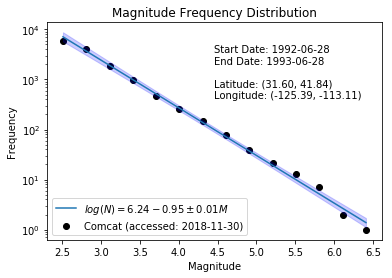

In [5]:
comcat = comcat_loader(landers.start_time, mw_min=2.5)
plot_mfd(comcat)

# UCERF3-ETAS: Landers

1. Cumulative event counts
2. Histogram of event counts
3. N-test visualization
4. Events versus time for single catalog
5. MFD for single catalog
    

## Load Comcat catalog for UCERF3-ETAS: Landers

In [6]:
comcat = comcat_loader(landers.start_time, landers.min_mw, verbose = True)

Fetched Comcat catalog in 2.317103862762451 seconds.

Downloaded Comcat Catalog with following parameters
Start Date: 1992-06-28 12:00:59.904000+00:00
End Date: 1993-05-28 04:47:20.064000+00:00
Min Latitude: 33.90 and Max Latitude: 37.17
Min Longitude: -119.10 and Max Longitude: -113.47
Min Magnitude: 4.96 and Max Magnitude: 6.30



## Cumulative Event Counts

Plotting cumulative event counts.
Converted 318682 ruptures from 10000 catalogs into a DataFrame in 50.573976039886475 seconds.



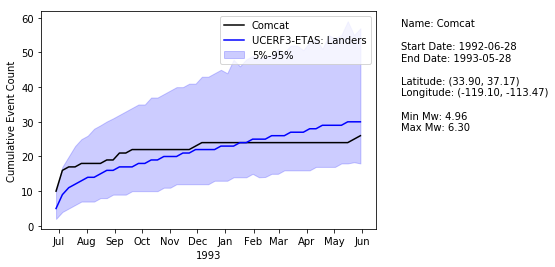

In [7]:
ax = plot_cumulative_events_versus_time(landers.filt_catalogs, 
                                        comcat,
                                        plot_args = {'sim_label': landers.name,
                                                     'obs_label': comcat.name})

## Histogram of Event Counts

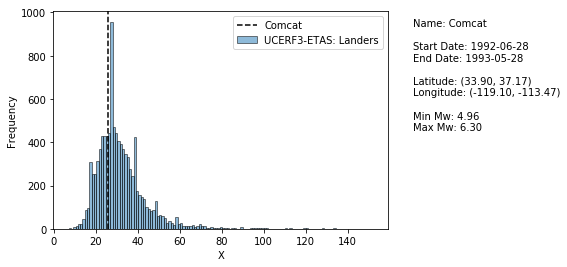

In [8]:
event_counts = [x.get_number_of_events() for x in landers.filt_catalogs]
comcat_count = comcat.get_number_of_events()

ax = plot_histogram(event_counts, 
                    comcat_count, 
                    catalog=comcat, 
                    plot_args={'obs_label': comcat.name,
                    'sim_label': landers.name})

## N-Test Results

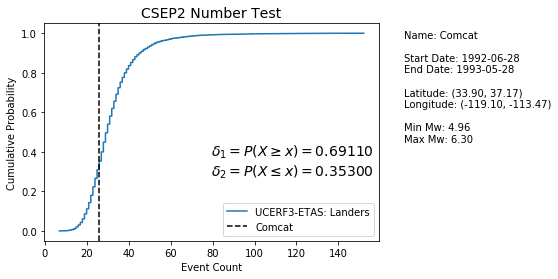

In [9]:
result = number_test(landers.filt_catalogs, comcat, plot=True)

## Magnitude versus time: UCERF3-ETAS

Plotting magnitude versus time.


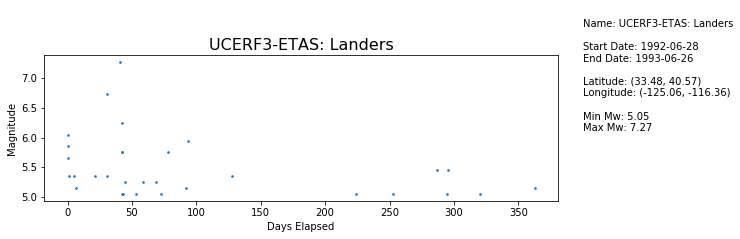

In [10]:
ax = plot_magnitude_versus_time(landers.filt_catalogs[0])

## Magnitude versus time: Comcat

Plotting magnitude versus time.


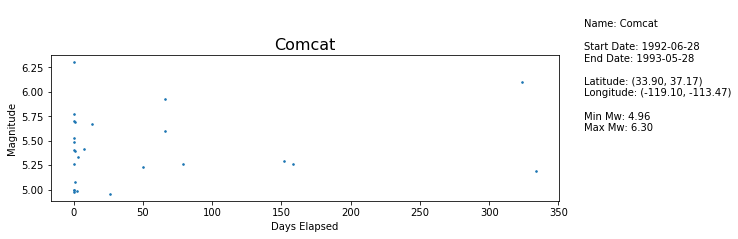

In [11]:
ax = plot_magnitude_versus_time(comcat)

## Magnitude Frequency Distributions: UCERF3-ETAS

Computing MFD for catalog UCERF3-ETAS: Landers.


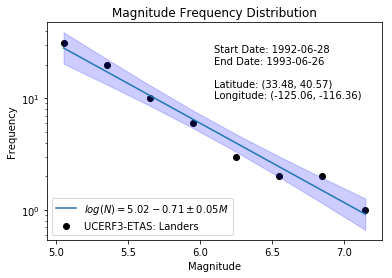

In [12]:
ax = plot_mfd(landers.filt_catalogs[0])

## Magnitude Frequency Distribution: Comcat 

Computing MFD for catalog Comcat.


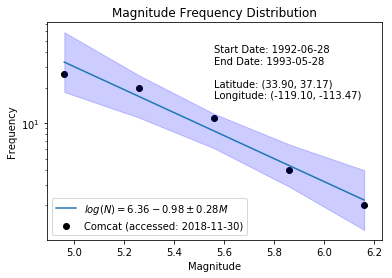

In [13]:
ax = plot_mfd(comcat)

## Distributions of *b*-values

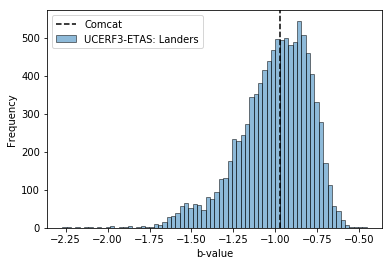

In [14]:
b_values = list(map(lambda x: x.get_mfd().loc[0,'b'], landers.filt_catalogs))
comcat.mfd = comcat.get_mfd()
ax = plot_histogram(b_values, 
                    comcat.mfd.loc[0,'b'], 
                    plot_args={'sim_label': landers.name,
                               'obs_label': comcat.name,
                               'xlabel': 'b-value'})

# UCERF3-ETAS: Big Bear

1. Cumulative event counts
2. Histogram of event counts
3. N-test visualization
4. Events versus time for single catalog
5. MFD for single catalog
    

## Load Comcat catalog for UCERF3-ETAS: Big Bear

In [15]:
comcat = comcat_loader(bigbear.start_time, bigbear.min_mw, verbose = True)

Fetched Comcat catalog in 12.327759981155396 seconds.

Downloaded Comcat Catalog with following parameters
Start Date: 1992-06-28 17:01:22.304000+00:00
End Date: 1993-05-28 04:47:20.064000+00:00
Min Latitude: 33.90 and Max Latitude: 37.17
Min Longitude: -119.10 and Max Longitude: -113.47
Min Magnitude: 4.96 and Max Magnitude: 6.10



## Cumulative Event Counts

Plotting cumulative event counts.
Converted 304006 ruptures from 10000 catalogs into a DataFrame in 56.554378032684326 seconds.



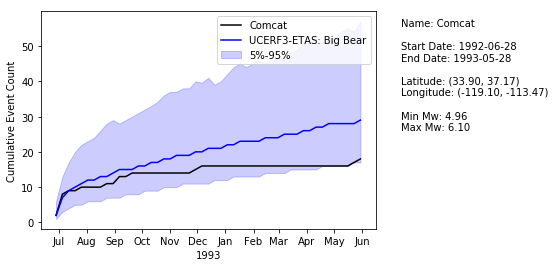

In [16]:
ax = plot_cumulative_events_versus_time(bigbear.filt_catalogs, 
                                        comcat,
                                        plot_args = {'sim_label': bigbear.name,
                                                     'obs_label': comcat.name})

## Histogram of Event Counts

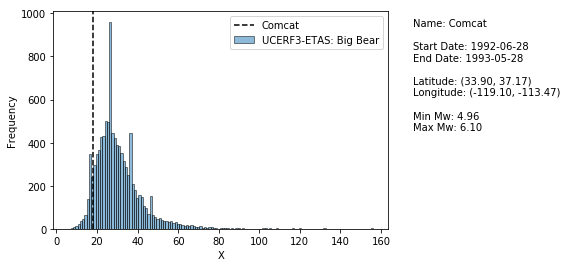

In [17]:
event_counts = [x.get_number_of_events() for x in bigbear.filt_catalogs]
comcat_count = comcat.get_number_of_events()

ax = plot_histogram(event_counts, 
                    comcat_count, 
                    catalog=comcat, 
                    plot_args={'obs_label': comcat.name,
                               'sim_label': bigbear.name})

## N-Test Results

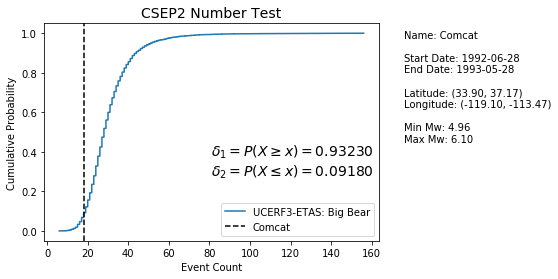

In [18]:
result = number_test(bigbear.filt_catalogs, comcat, plot=True)

## Magnitude versus time: UCERF3-ETAS

Plotting magnitude versus time.


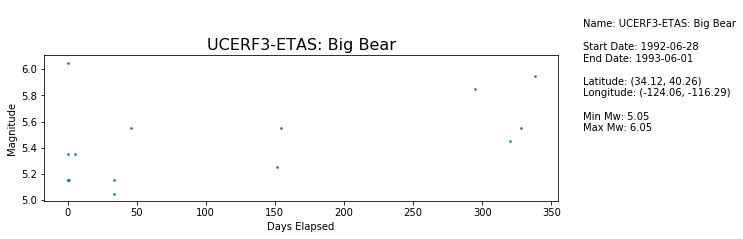

In [19]:
ax = plot_magnitude_versus_time(bigbear.filt_catalogs[0])

## Magnitude versus time: Comcat

Plotting magnitude versus time.


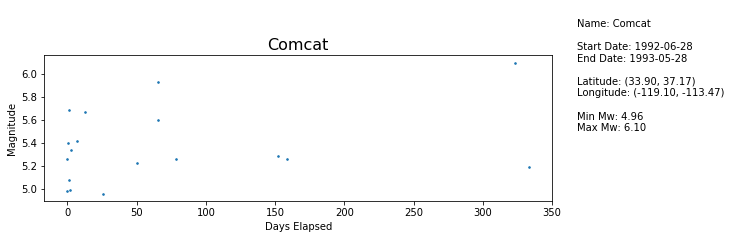

In [20]:
ax = plot_magnitude_versus_time(comcat)

## Magnitude Frequency Distributions: UCERF3-ETAS

Computing MFD for catalog UCERF3-ETAS: Big Bear.


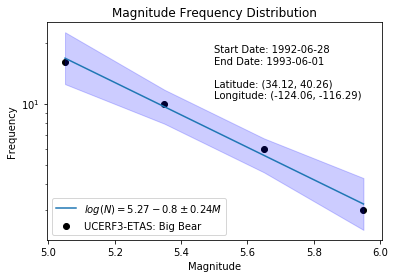

In [21]:
ax = plot_mfd(bigbear.filt_catalogs[0])

## Magnitude Frequency Distribution: Comcat 

Computing MFD for catalog Comcat.


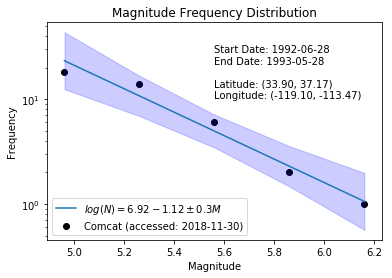

In [22]:
ax = plot_mfd(comcat)

## Distributions of *b*-values

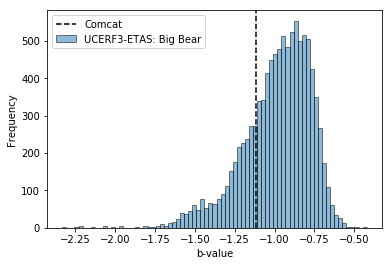

In [23]:
b_values = list(map(lambda x: x.get_mfd().loc[0,'b'], bigbear.filt_catalogs))
comcat.mfd = comcat.get_mfd()
ax = plot_histogram(b_values, 
                    comcat.mfd.loc[0,'b'], 
                    plot_args={'sim_label': bigbear.name,
                               'obs_label': comcat.name,
                               'xlabel': 'b-value'})

# UCERF3-ETAS: Big Bear + 30 days

1. Cumulative event counts
2. Histogram of event counts
3. N-test visualization
4. Events versus time for single catalog
5. MFD for single catalog

## Load Comcat catalog for UCERF3-ETAS: Big Bear + 30 Days

In [24]:
comcat = comcat_loader(bigbear_p30.start_time, bigbear_p30.min_mw, verbose = True)

Fetched Comcat catalog in 5.192399978637695 seconds.

Downloaded Comcat Catalog with following parameters
Start Date: 1992-08-17 20:42:02.624000+00:00
End Date: 1993-05-28 04:47:20.064000+00:00
Min Latitude: 34.06 and Max Latitude: 37.17
Min Longitude: -119.10 and Max Longitude: -113.47
Min Magnitude: 5.19 and Max Magnitude: 6.10



## Cumulative Event Counts

Plotting cumulative event counts.
Converted 195981 ruptures from 10000 catalogs into a DataFrame in 59.483938694000244 seconds.



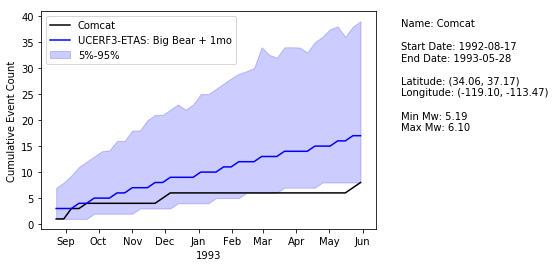

In [25]:
ax = plot_cumulative_events_versus_time(bigbear_p30.filt_catalogs, 
                                        comcat,
                                        plot_args = {'sim_label': bigbear_p30.name,
                                                     'obs_label': comcat.name,
                                                     'legend_loc': 'upper left'})

## Histogram of Event Counts

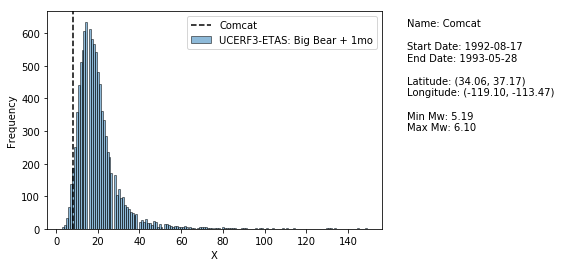

In [26]:
event_counts = [x.get_number_of_events() for x in bigbear_p30.filt_catalogs]
comcat_count = comcat.get_number_of_events()

ax = plot_histogram(event_counts, 
                    comcat_count, 
                    catalog=comcat, 
                    plot_args={'obs_label': comcat.name,
                    'sim_label': bigbear_p30.name})

## N-Test Results

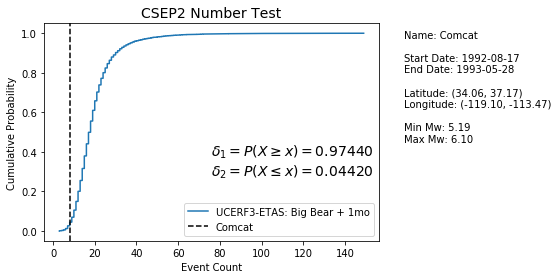

In [27]:
result = number_test(bigbear_p30.filt_catalogs, comcat, plot=True)

## Magnitude versus time: UCERF3-ETAS

Plotting magnitude versus time.


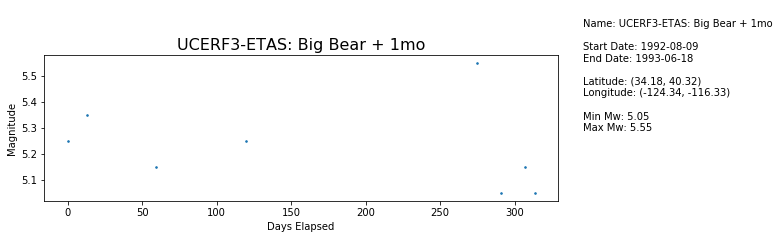

In [28]:
ax = plot_magnitude_versus_time(bigbear_p30.filt_catalogs[0])

## Magnitude versus time: Comcat

Plotting magnitude versus time.


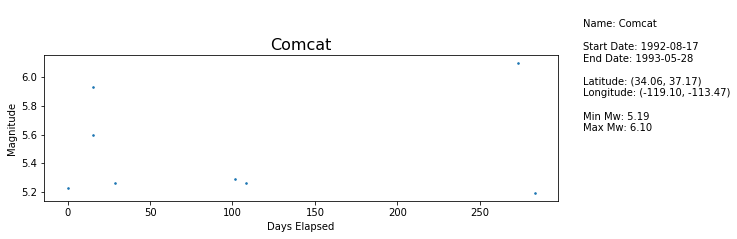

In [29]:
ax = plot_magnitude_versus_time(comcat)

## Magnitude Frequency Distributions -- UCERF3-ETAS

Computing MFD for catalog UCERF3-ETAS: Big Bear + 1mo.


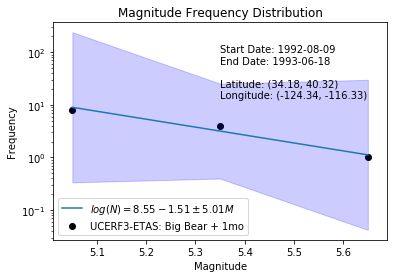

In [30]:
ax = plot_mfd(bigbear_p30.filt_catalogs[0])

## Magnitude Frequency Distribution -- Comcat 

Computing MFD for catalog Comcat.


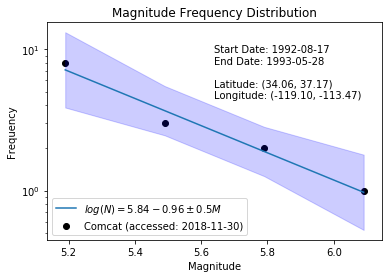

In [31]:
ax = plot_mfd(comcat)

## Distributions of *b*-values

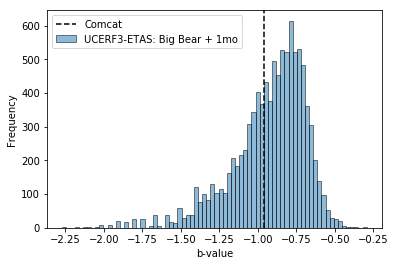

In [32]:
b_values = list(map(lambda x: x.get_mfd().loc[0,'b'], bigbear_p30.filt_catalogs))
comcat.mfd = comcat.get_mfd()
ax = plot_histogram(b_values, 
                    comcat.mfd.loc[0,'b'], 
                    plot_args={'sim_label': bigbear_p30.name,
                               'obs_label': comcat.name,
                               'xlabel': 'b-value'})

# UCERF3-No Faults: Landers

1. Cumulative event counts
2. Histogram of event counts
3. N-test visualization
4. Events versus time for single catalog
5. MFD for single catalog

## Load Comcat catalog for UCERF3-No Faults: Landers

In [33]:
comcat = comcat_loader(nofaults.start_time, nofaults.min_mw, verbose = True)

Fetched Comcat catalog in 2.2441751956939697 seconds.

Downloaded Comcat Catalog with following parameters
Start Date: 1992-06-28 12:00:59.904000+00:00
End Date: 1993-05-28 04:47:20.064000+00:00
Min Latitude: 33.90 and Max Latitude: 37.17
Min Longitude: -119.10 and Max Longitude: -113.47
Min Magnitude: 4.96 and Max Magnitude: 6.30



## Cumulative Event Counts

Plotting cumulative event counts.
Converted 305011 ruptures from 10000 catalogs into a DataFrame in 55.09207510948181 seconds.



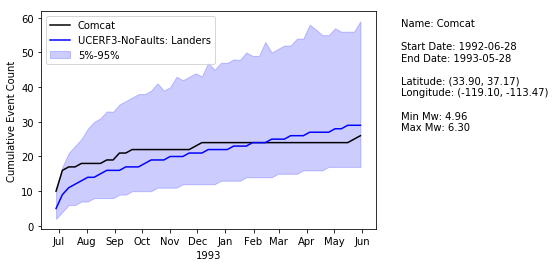

In [34]:
ax = plot_cumulative_events_versus_time(nofaults.filt_catalogs, 
                                        comcat,
                                        plot_args = {'sim_label': nofaults.name,
                                                     'obs_label': comcat.name,
                                                     'legend_loc': 'upper left'})

## Histogram of Event Counts

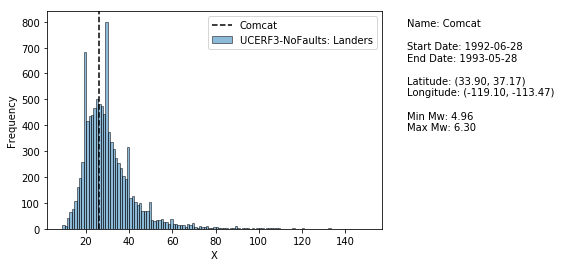

In [42]:
event_counts = [x.get_number_of_events() for x in nofaults.filt_catalogs]
comcat_count = comcat.get_number_of_events()
ax = plot_histogram(event_counts, 
                    comcat_count, 
                    catalog=comcat, 
                    plot_args={'obs_label': comcat.name,
                               'sim_label': nofaults.name})

## N-Test Results

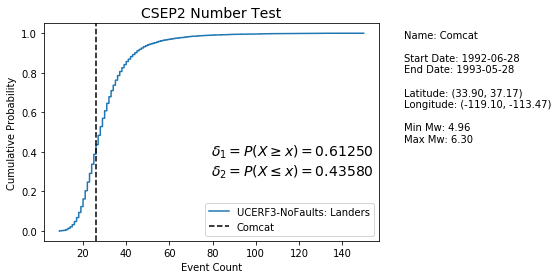

In [36]:
result = number_test(nofaults.filt_catalogs, comcat, plot=True)

## Magnitude versus time: UCERF3-NoFaults

Plotting magnitude versus time.


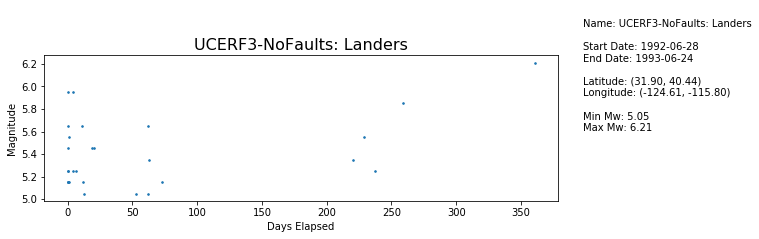

In [37]:
ax = plot_magnitude_versus_time(nofaults.filt_catalogs[0])

## Magnitude versus time: Comcat

Plotting magnitude versus time.


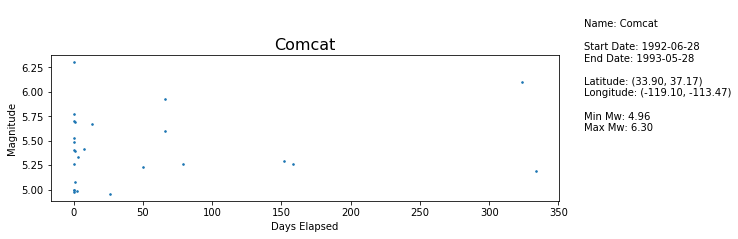

In [38]:
ax = plot_magnitude_versus_time(comcat)

## Magnitude Frequency Distributions: UCERF3-NoFaults

Computing MFD for catalog UCERF3-NoFaults: Landers.


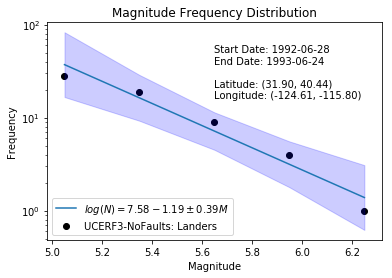

In [39]:
ax = plot_mfd(nofaults.filt_catalogs[0])

## Magnitude Frequency Distribution: Comcat 

Computing MFD for catalog Comcat.


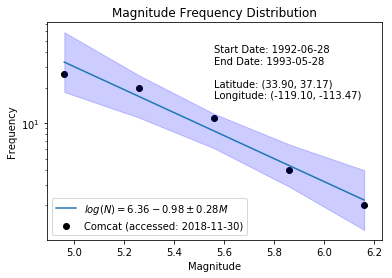

In [40]:
ax = plot_mfd(comcat)

## Distributions of *b*-values

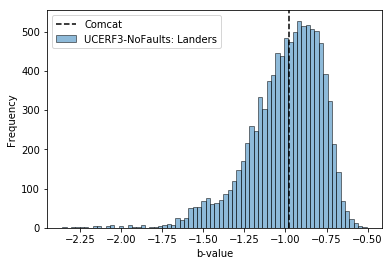

In [41]:
b_values = list(map(lambda x: x.get_mfd().loc[0,'b'], nofaults.filt_catalogs))
comcat.mfd = comcat.get_mfd()
ax = plot_histogram(b_values, 
                    comcat.mfd.loc[0,'b'], 
                    plot_args={'sim_label': nofaults.name,
                               'obs_label': comcat.name,
                               'xlabel': 'b-value'})